# CLUSTERING DE SEMILLAS

## Introducción

En esta practica nos enfocamos en clustering. Clustering es una técnica de aprendizaje no supervidado para organizar en distintos grupos los datos de una semilla, de manera que los datos en un grupo tengan características similares.
Primero usaremos una herramienta llamada PCA para determinar cuál es el mejor scaler para usar con esta semilla y luego aplicaremos distintos modos de agrupamiento con el objetivo de encontrar los hiper-parametros más relevantes y discutir los resultados obtenidos.

#### Integrantes: Javier Díez y Mario Hidalgo

area          0
perimetro     0
compacidad    0
longitud      0
anchura       0
asimetria     0
surco         0
clase         0
dtype: int64 0


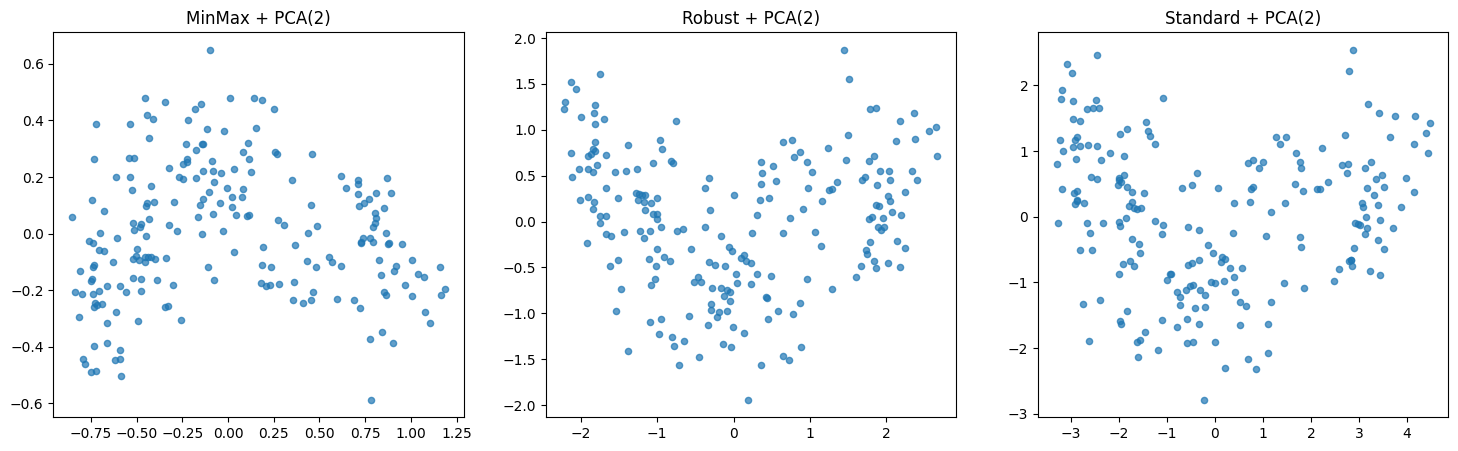

In [4]:
# ─ Imports básicos ─
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # (solo para estilos, si lo prefieres)

# ─ Semilla de reproducibilidad ─
NIA = 100495801
np.random.seed(NIA)

# ─ scikit-learn pipelines y utilidades ─
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ─ Ajustes de visualización ─
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

# 2. Carga y exploración de datos

# Leer el CSV 
df = pd.read_csv('semillas.csv')  
df.head(), df.describe()

# Comprobar nulos, duplicados…
print(df.isna().sum(), df.duplicated().sum())

# 3. Comparación de scalers con PCA (0.25 p)

scalers = {
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler(),
    'Standard': StandardScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, (name, scaler) in zip(axes, scalers.items()):
    pipe = make_pipeline(scaler, PCA(n_components=2, random_state=NIA))
    X2 = pipe.fit_transform(df.drop('clase', axis=1))
    ax.scatter(X2[:,0], X2[:,1], s=20, alpha=0.7)
    ax.set_title(f'{name} + PCA(2)')
plt.show()



## Evaluación de Scalers
De los diferentes Scalers, podemos observar que el MinMax es el que nos da unos parámetros menos amplios ([-0.75, 0.75], [-0.6, 0.6]) y es por tanto el primero que vamos a descartar. En cuanto a los otros dos si bien el Standard scaler nos da una mayor amplitu de ejes, existen algunos valores apartados que provocan este estiramiento del eje mientras que en el Robust scaler vemos un poco más de condensación y por tanto será el que elijamos.